# ОИАД. Лабораторная работа №1

Используйте набор данных 'datasets/teen_phone_addiction_dataset.csv'. 

Возьмите столбец $N \% 7 $, где $N$ - номер в списке группы (см. ниже).

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

df = pd.read_csv('../datasets/teen_phone_addiction_dataset.csv')

sleep_hours = df['Sleep_Hours'].values
sleep_hours

array([6.1, 6.5, 5.5, ..., 6.5, 7.5, 6.9], shape=(3000,))

## I. 
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения


=== I. Числовые характеристики ===
Среднее: 6.4898
Дисперсия: 2.2215
Мода: 6.1000
Медиана: 6.5000
Квантили: 0.25=5.5000, 0.5=6.5000, 0.75=7.5000
Эксцесс: 2.7031
Ассиметрия: 0.0118
Интерквартильный размах (IQR): 2.0000


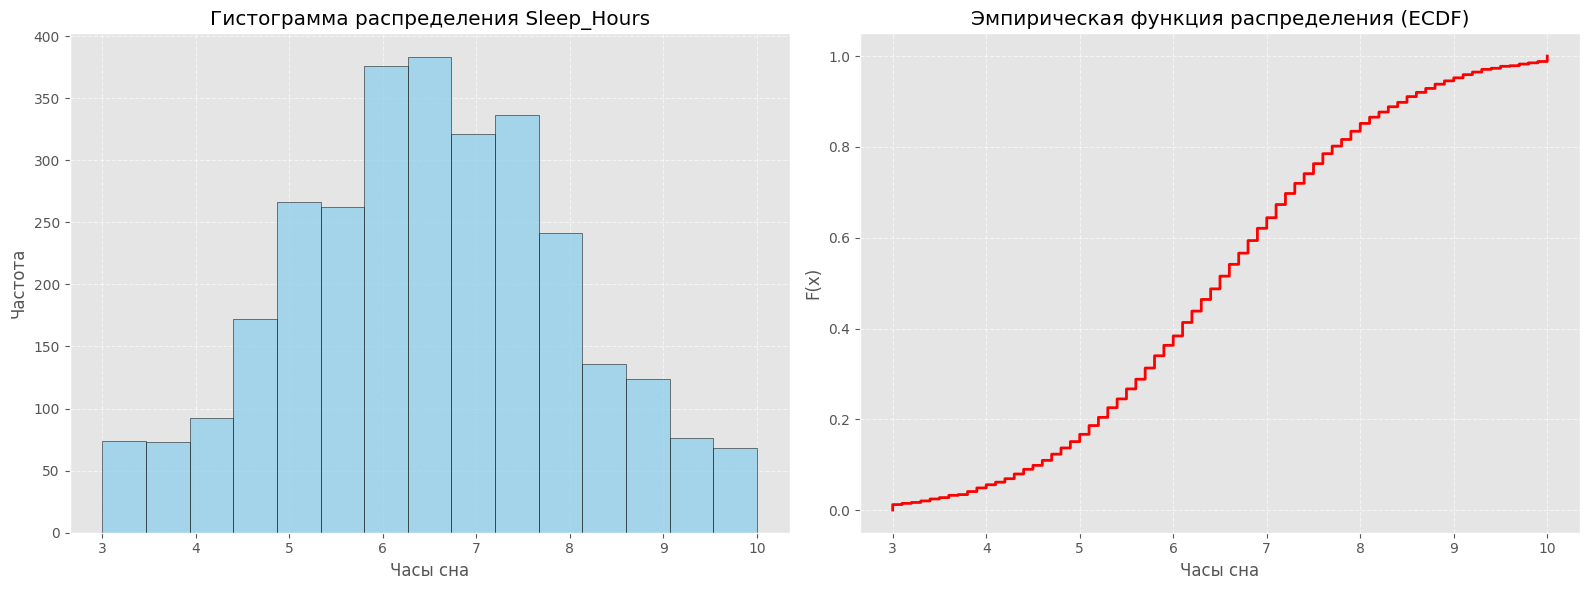

In [ ]:
# I.1 Числовые характеристики
mean_val = np.mean(sleep_hours)
variance_val = np.var(sleep_hours, ddof=0)
mode_val = stats.mode(sleep_hours, keepdims=True).mode[0]
median_val = np.median(sleep_hours)
q25 = np.quantile(sleep_hours, 0.25)
q50 = np.quantile(sleep_hours, 0.50)
q75 = np.quantile(sleep_hours, 0.75)
kurtosis_val = stats.kurtosis(sleep_hours, fisher=False)
skewness_val = stats.skew(sleep_hours)
iqr_val = q75 - q25

print("=== I. Числовые характеристики ===")
print(f"Среднее: {mean_val:.4f}")
print(f"Дисперсия: {variance_val:.4f}")
print(f"Мода: {mode_val:.4f}")
print(f"Медиана: {median_val:.4f}")
print(f"Квантили: 0.25={q25:.4f}, 0.5={q50:.4f}, 0.75={q75:.4f}")
print(f"Эксцесс: {kurtosis_val:.4f}")
print(f"Ассиметрия: {skewness_val:.4f}")
print(f"Интерквартильный размах (IQR): {iqr_val:.4f}")

# I.2 Графики
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Гистограмма
axes[0].hist(sleep_hours, bins=15, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].set_title('Гистограмма распределения Sleep_Hours')
axes[0].set_xlabel('Часы сна')
axes[0].set_ylabel('Частота')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Эмпирическая функция распределения (ECDF)
sorted_data = np.sort(sleep_hours)
y = np.arange(1, len(sorted_data)+1) / len(sorted_data)
axes[1].step(sorted_data, y, where='post', color='red', linewidth=2)
axes[1].set_title('Эмпирическая функция распределения (ECDF)')
axes[1].set_xlabel('Часы сна')
axes[1].set_ylabel('F(x)')
axes[1].grid(True, linestyle='--', alpha=0.6)=== I. Числовые характеристики ===
Среднее: 6.4898
Дисперсия: 2.2215
Мода: 6.1000
Медиана: 6.5000
Квантили: 0.25=5.5000, 0.5=6.5000, 0.75=7.5000
Эксцесс: 2.7031
Ассиметрия: 0.0118
Интерквартильный размах (IQR): 2.0000

plt.tight_layout()
plt.show()

## Описание графиков
Гистограмма распределения получилась довольно симметричной(ассиметрия всего 0.0118), унимодальной (Мода: 6.1000), очень похожей на нормальное распределение. Большинство данных (75%) находится в диапазоне 5.5–7.5 часов
График эмпирической функции распределения: IQR = 2.0 часа (от 5.5 до 7.5 часов)

## II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

In [52]:
mu_hat = np.mean(sleep_hours)
sigma_hat = np.std(sleep_hours, ddof=0)

n_bins = 10
observed_freq, bin_edges = np.histogram(sleep_hours, bins=n_bins)

expected_freq = []
for i in range(n_bins):
    lower = bin_edges[i]
    upper = bin_edges[i+1]
    prob = stats.norm.cdf(upper, mu_hat, sigma_hat) - stats.norm.cdf(lower, mu_hat, sigma_hat)
    expected_freq.append(prob * len(sleep_hours))

expected_freq = np.array(expected_freq)

min_exp = 5
while np.any(expected_freq < min_exp) and len(expected_freq) > 3:
    expected_freq = np.concatenate([expected_freq[:-2], [expected_freq[-2] + expected_freq[-1]]])
    observed_freq = np.concatenate([observed_freq[:-2], [observed_freq[-2] + observed_freq[-1]]])

chi2_stat = np.sum((observed_freq - expected_freq)**2 / expected_freq)

df_chi2 = len(observed_freq) - 1 - 2

alpha = 0.05
chi2_critical = stats.chi2.ppf(1 - alpha, df_chi2)

print("\n=== II.1 Критерий Хи-квадрат (вручную) ===")
print(f"Наблюдаемые частоты: {observed_freq}")
print(f"Ожидаемые частоты: {[round(x, 2) for x in expected_freq]}")
print(f"Статистика Хи-квадрат: {chi2_stat:.4f}")
print(f"Критическое значение (α=0.05, df={df_chi2}): {chi2_critical:.4f}")

if chi2_stat > chi2_critical:
    print("❌ Отклоняем H0: данные НЕ соответствуют нормальному распределению.")
else:
    print("✅ Не отклоняем H0: данные могут быть нормальными.")


=== II.1 Критерий Хи-квадрат (вручную) ===
Наблюдаемые частоты: [ 98 141 262 438 523 557 430 283 162 106]
Ожидаемые частоты: [np.float64(63.05), np.float64(149.47), np.float64(285.33), np.float64(438.61), np.float64(542.94), np.float64(541.22), np.float64(434.47), np.float64(280.85), np.float64(146.19), np.float64(61.27)]
Статистика Хи-квадрат: 57.3791
Критическое значение (α=0.05, df=7): 14.0671
❌ Отклоняем H0: данные НЕ соответствуют нормальному распределению.


In [53]:
n = len(sleep_hours)

SE_skew = np.sqrt(6 * n * (n - 1) / ((n - 2) * (n + 1) * (n + 3)))
SE_kurt = np.sqrt(24 * n * (n - 1)**2 / ((n - 3) * (n - 2) * (n + 5) * (n + 7)))

skewness_val = stats.skew(sleep_hours)
kurtosis_val = stats.kurtosis(sleep_hours, fisher=False)

print("\n=== II.2 Критерий асимметрии и эксцесса ===")
print(f"Асимметрия: {skewness_val:.4f} | SE: {SE_skew:.4f} | 2*SE: {2*SE_skew:.4f}")
print(f"Эксцесс (Фишер): {kurtosis_val:.4f} | Ожидаемый: 3 | Отклонение: {abs(kurtosis_val - 3):.4f}")
print(f"SE эксцесса: {SE_kurt:.4f} | 2*SE: {2*SE_kurt:.4f}")

is_skew_significant = abs(skewness_val) > 2 * SE_skew
is_kurt_significant = abs(kurtosis_val - 3) > 2 * SE_kurt

if is_skew_significant:
    print("❌ Асимметрия значимо отличается от 0 → НЕ нормально")
else:
    print("✅ Асимметрия в пределах нормы")

if is_kurt_significant:
    print("❌ Эксцесс значимо отличается от 3 → НЕ нормально")
else:
    print("✅ Эксцесс в пределах нормы")

if is_skew_significant or is_kurt_significant:
    print("\n📊 Вывод: Данные НЕ являются нормальными по критерию асимметрии/эксцесса.")
else:
    print("\n📊 Вывод: Данные могут считаться нормальными (но вряд ли!).")


=== II.2 Критерий асимметрии и эксцесса ===
Асимметрия: 0.0118 | SE: 0.0447 | 2*SE: 0.0894
Эксцесс (Фишер): 2.7031 | Ожидаемый: 3 | Отклонение: 0.2969
SE эксцесса: 0.0893 | 2*SE: 0.1786
✅ Асимметрия в пределах нормы
❌ Эксцесс значимо отличается от 3 → НЕ нормально

📊 Вывод: Данные НЕ являются нормальными по критерию асимметрии/эксцесса.


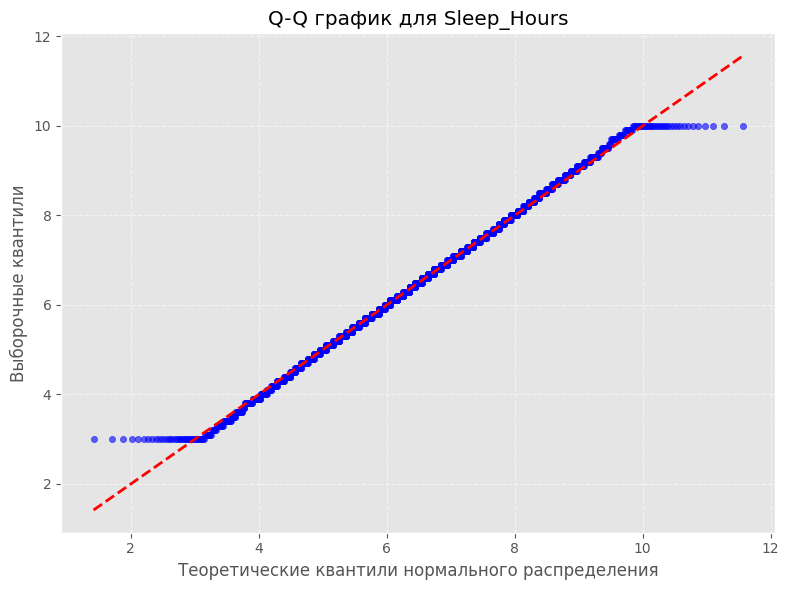

In [54]:
plt.figure(figsize=(8, 6))

sorted_data = np.sort(sleep_hours)

n = len(sorted_data)
theoretical_quantiles = stats.norm.ppf(np.arange(1, n+1) / (n+1), loc=mu_hat, scale=sigma_hat)

plt.scatter(theoretical_quantiles, sorted_data, color='blue', alpha=0.6, s=20)
plt.plot([theoretical_quantiles.min(), theoretical_quantiles.max()], 
         [theoretical_quantiles.min(), theoretical_quantiles.max()], 
         'r--', linewidth=2)

plt.title('Q-Q график для Sleep_Hours')
plt.xlabel('Теоретические квантили нормального распределения')
plt.ylabel('Выборочные квантили')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

данные имеют тяжелый левый хвост и тяжелый правый хвост

## III. 
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных


=== III. После логарифмирования ===
Среднее: 1.8434
Дисперсия: 0.0599
Мода: 1.8100
Медиана: 1.8733
Квантили: 0.25=1.7066, 0.5=1.8733, 0.75=2.0162
Эксцесс: 3.3890
Ассиметрия: -0.6507
IQR: 0.3097


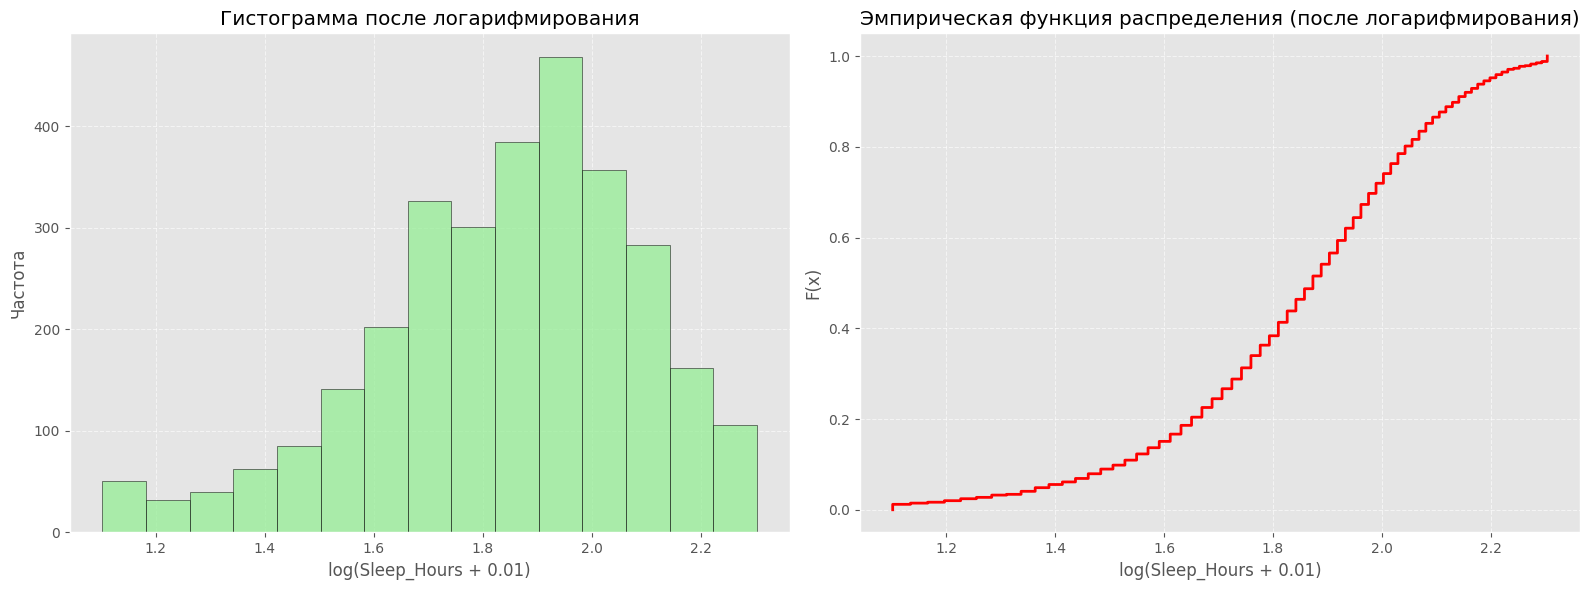

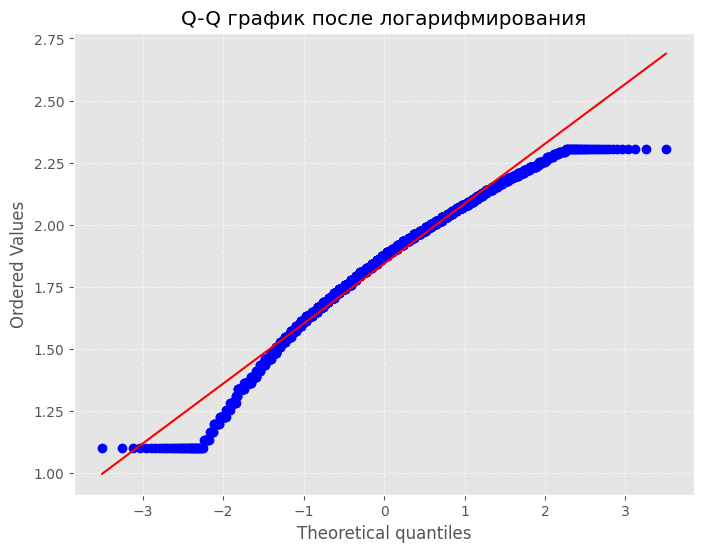


=== Хи-квадрат после логарифмирования ===
Статистика: 282.9322, критическое: 14.0671
❌ Отклоняем H0: данные всё ещё НЕ нормальны!

=== Асимметрия/Эксцесс после логарифмирования ===
Асимметрия: -0.6507 | 2*SE: 0.0894
Эксцесс: 3.3890 | 2*SE: 0.1786
❌ Один или оба критерия не выполнены — нормальность не достигнута.

Shapiro-Wilk p-value: 0.0000 → Не нормально


In [55]:
sleep_hours_log = np.log(sleep_hours + 0.01)

# Повторим I и II для обработанных данных
mean_log = np.mean(sleep_hours_log)
var_log = np.var(sleep_hours_log, ddof=0)
mode_log = stats.mode(np.round(sleep_hours_log, 2), keepdims=True).mode[0]
median_log = np.median(sleep_hours_log)
q25_log = np.quantile(sleep_hours_log, 0.25)
q50_log = np.quantile(sleep_hours_log, 0.50)
q75_log = np.quantile(sleep_hours_log, 0.75)
kurtosis_log = stats.kurtosis(sleep_hours_log, fisher=False)
skewness_log = stats.skew(sleep_hours_log)
iqr_log = q75_log - q25_log

print("\n=== III. После логарифмирования ===")
print(f"Среднее: {mean_log:.4f}")
print(f"Дисперсия: {var_log:.4f}")
print(f"Мода: {mode_log:.4f}")
print(f"Медиана: {median_log:.4f}")
print(f"Квантили: 0.25={q25_log:.4f}, 0.5={q50_log:.4f}, 0.75={q75_log:.4f}")
print(f"Эксцесс: {kurtosis_log:.4f}")
print(f"Ассиметрия: {skewness_log:.4f}")
print(f"IQR: {iqr_log:.4f}")

# Гистограмма и ECDF
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].hist(sleep_hours_log, bins=15, edgecolor='black', alpha=0.7, color='lightgreen')
axes[0].set_title('Гистограмма после логарифмирования')
axes[0].set_xlabel('log(Sleep_Hours + 0.01)')
axes[0].set_ylabel('Частота')
axes[0].grid(True, linestyle='--', alpha=0.6)

sorted_log = np.sort(sleep_hours_log)
y_log = np.arange(1, len(sorted_log)+1) / len(sorted_log)
axes[1].step(sorted_log, y_log, where='post', color='red', linewidth=2)
axes[1].set_title('Эмпирическая функция распределения (после логарифмирования)')
axes[1].set_xlabel('log(Sleep_Hours + 0.01)')
axes[1].set_ylabel('F(x)')
axes[1].grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(sleep_hours_log, dist="norm", plot=plt)
plt.title('Q-Q график после логарифмирования')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Проверка на нормальность: Хи-квадрат (с новыми данными)
n_bins = 10
observed_log, bins_log = np.histogram(sleep_hours_log, bins=n_bins)
mu_log = np.mean(sleep_hours_log)
sigma_log = np.std(sleep_hours_log, ddof=0)

expected_log = []
for i in range(len(bins_log)-1):
    lower = bins_log[i]
    upper = bins_log[i+1]
    prob = stats.norm.cdf(upper, mu_log, sigma_log) - stats.norm.cdf(lower, mu_log, sigma_log)
    expected_log.append(prob * len(sleep_hours_log))

expected_log = np.array(expected_log)

# Объединим интервалы
min_exp = 5
while np.any(expected_log < min_exp) and len(expected_log) > 3:
    expected_log = np.concatenate([expected_log[:-2], [expected_log[-2] + expected_log[-1]]])
    observed_log = np.concatenate([observed_log[:-2], [observed_log[-2] + observed_log[-1]]])

chi2_stat_log = np.sum((observed_log - expected_log)**2 / expected_log)
df_log = len(observed_log) - 1 - 2
chi2_crit_log = stats.chi2.ppf(0.95, df_log)

print("\n=== Хи-квадрат после логарифмирования ===")
print(f"Статистика: {chi2_stat_log:.4f}, критическое: {chi2_crit_log:.4f}")
if chi2_stat_log > chi2_crit_log:
    print("❌ Отклоняем H0: данные всё ещё НЕ нормальны!")
else:
    print("✅ Не отклоняем H0: нормальность достигнута.")

# Критерий асимметрии/эксцесса
SE_skew_log = np.sqrt(6 * len(sleep_hours_log) * (len(sleep_hours_log) - 1) / 
                      ((len(sleep_hours_log) - 2) * (len(sleep_hours_log) + 1) * (len(sleep_hours_log) + 3)))
SE_kurt_log = np.sqrt(24 * len(sleep_hours_log) * (len(sleep_hours_log) - 1)**2 / 
                      ((len(sleep_hours_log) - 3) * (len(sleep_hours_log) - 2) * (len(sleep_hours_log) + 5) * (len(sleep_hours_log) + 7)))

print("\n=== Асимметрия/Эксцесс после логарифмирования ===")
print(f"Асимметрия: {skewness_log:.4f} | 2*SE: {2*SE_skew_log:.4f}")
print(f"Эксцесс: {kurtosis_log:.4f} | 2*SE: {2*SE_kurt_log:.4f}")

if abs(skewness_log) < 2*SE_skew_log and abs(kurtosis_log - 3) < 2*SE_kurt_log:
    print("✅ Оба критерия удовлетворены — можно считать нормальным!")
else:
    print("❌ Один или оба критерия не выполнены — нормальность не достигнута.")

# Shapiro-Wilk (для справки)
shapiro_stat, shapiro_p = stats.shapiro(sleep_hours_log)
print(f"\nShapiro-Wilk p-value: {shapiro_p:.4f} → {'Нормально' if shapiro_p > 0.05 else 'Не нормально'}")

получили что теперь гистограмма имеет унимодальное, ассиметричное (с уклоном вправо) распределение. Эмпирическая функция тоже немного изменилась так как теперь большее количество данных концентрируется в высоких квантилях и растет она теперь в конце немного сильнее чем раньше. На графике Q-Q можно увидеть что теперь синяя линия теперь стала кривой и ещё немного сохраняется отклонение концов , что говорит о ассиметрии распределения и о тяжелом правом конце и слегка тяжелом левом конце.

попробуем привести к нормальному распределению через удаление выбросов

In [44]:
# Определяем выбросы по IQR
q1 = np.quantile(sleep_hours, 0.25)
q3 = np.quantile(sleep_hours, 0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Удаляем выбросы
sleep_clean = sleep_hours[(sleep_hours >= lower_bound) & (sleep_hours <= upper_bound)]

print(f"Количество выбросов: {len(sleep_hours) - len(sleep_clean)}")
print(f"Новый размер данных: {len(sleep_clean)}")

Количество выбросов: 0
Новый размер данных: 3000


но количество выбросов = 0 -> это не для нас

пробуем через нормализацию данных

=== I. Числовые характеристики ===
Среднее: -0.0000
Дисперсия: 1.0000
Мода: -0.2615
Медиана: 0.0069
Квантили: 0.25=-0.6641, 0.5=0.0069, 0.75=0.6778
Эксцесс: 2.7031
Ассиметрия: 0.0118
Интерквартильный размах (IQR): 1.3419


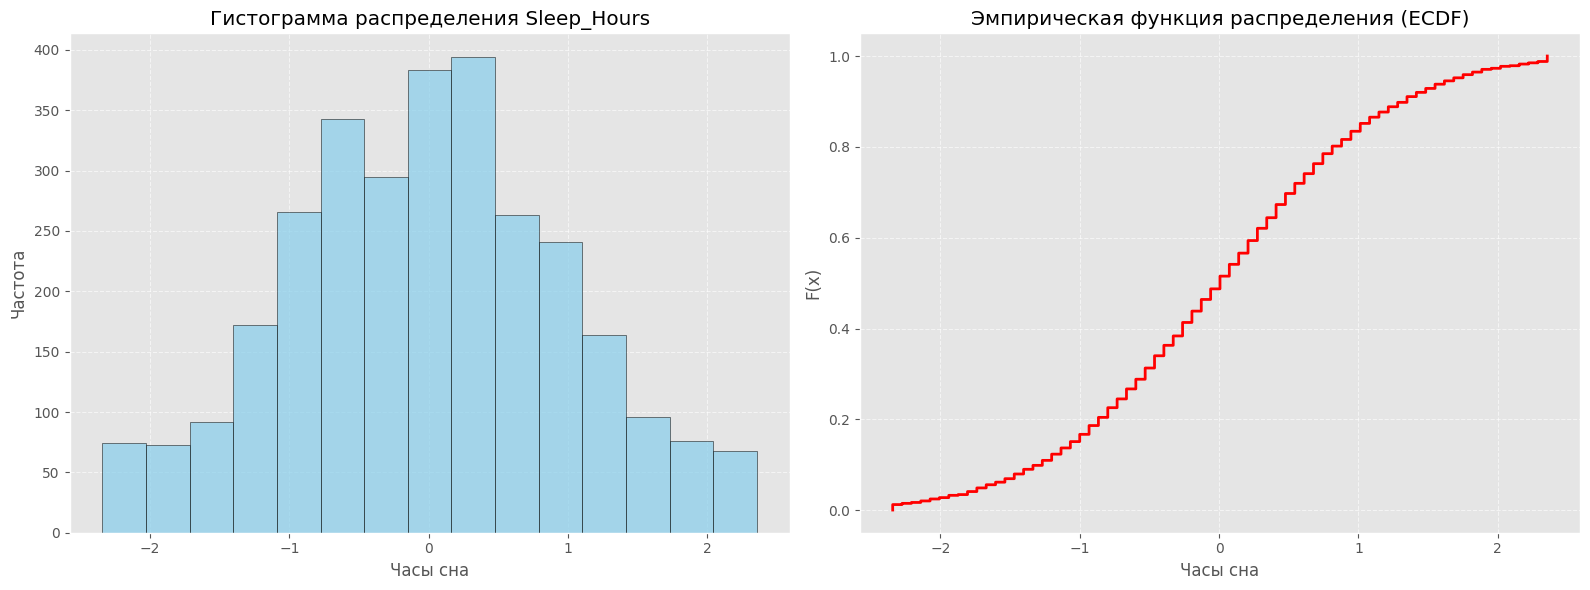

In [60]:
# Стандартизация: (x - mean) / std
sleep_std = (sleep_hours - np.mean(sleep_hours)) / np.std(sleep_hours)

# Проверка нормальности (пункты I и II)
mean_std = np.mean(sleep_std)
var_std = np.var(sleep_std, ddof=0)


# I.1 Числовые характеристики
mean_val_std = np.mean(sleep_std)
variance_val_std  = np.var(sleep_std, ddof=0)
mode_val_std  = stats.mode(sleep_std, keepdims=True).mode[0]
median_val_std  = np.median(sleep_std)
q25_std  = np.quantile(sleep_std, 0.25)
q50_std  = np.quantile(sleep_std, 0.50)
q75_std  = np.quantile(sleep_std, 0.75)
kurtosis_val_std  = stats.kurtosis(sleep_std, fisher=False)
skewness_val_std  = stats.skew(sleep_std)
iqr_val_std  = q75_std  - q25_std 

print("=== I. Числовые характеристики ===")
print(f"Среднее: {mean_val_std :.4f}")
print(f"Дисперсия: {variance_val_std :.4f}")
print(f"Мода: {mode_val_std :.4f}")
print(f"Медиана: {median_val_std :.4f}")
print(f"Квантили: 0.25={q25_std :.4f}, 0.5={q50_std :.4f}, 0.75={q75_std :.4f}")
print(f"Эксцесс: {kurtosis_val_std :.4f}")
print(f"Ассиметрия: {skewness_val_std :.4f}")
print(f"Интерквартильный размах (IQR): {iqr_val_std :.4f}")

# I.2 Графики
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Гистограмма
axes[0].hist(sleep_std, bins=15, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].set_title('Гистограмма распределения Sleep_Hours')
axes[0].set_xlabel('Часы сна')
axes[0].set_ylabel('Частота')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Эмпирическая функция распределения (ECDF)
sorted_data_std = np.sort(sleep_std)
y_std = np.arange(1, len(sorted_data_std)+1) / len(sorted_data_std)
axes[1].step(sorted_data_std, y_std, where='post', color='red', linewidth=2)
axes[1].set_title('Эмпирическая функция распределения (ECDF)')
axes[1].set_xlabel('Часы сна')
axes[1].set_ylabel('F(x)')
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

если не обращать внимание на численные значение то графики в целом такие же как и у исходных данных. Поменялись только характеристики из-за нормализации. 

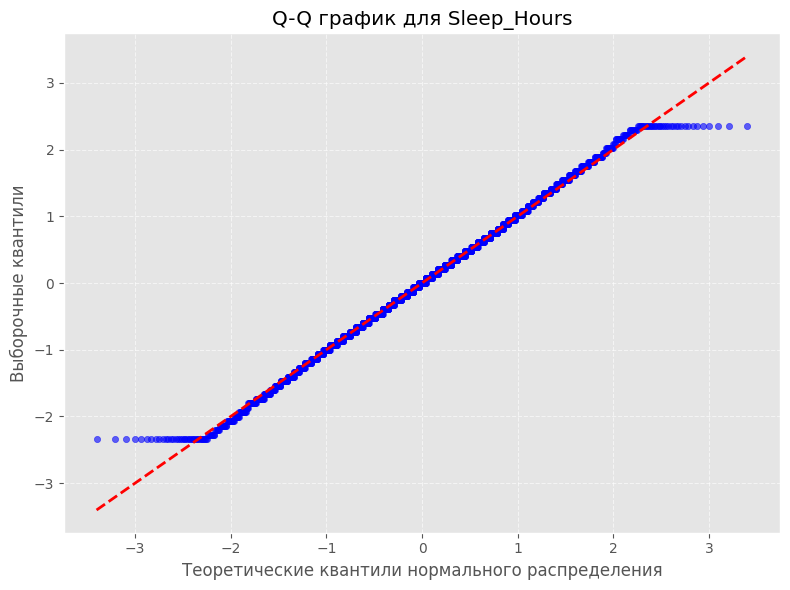

In [58]:
plt.figure(figsize=(8, 6))

sorted_data_std = np.sort(sleep_std)

n = len(sorted_data_std)
theoretical_quantiles = stats.norm.ppf(np.arange(1, n+1) / (n+1), loc=mu_hat_std, scale=sigma_hat_std)

plt.scatter(theoretical_quantiles, sorted_data_std, color='blue', alpha=0.6, s=20)
plt.plot([theoretical_quantiles.min(), theoretical_quantiles.max()], 
         [theoretical_quantiles.min(), theoretical_quantiles.max()], 
         'r--', linewidth=2)

plt.title('Q-Q график для Sleep_Hours')
plt.xlabel('Теоретические квантили нормального распределения')
plt.ylabel('Выборочные квантили')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Q-Q график такой же как и у исходных данных.

In [61]:
mu_hat_std = np.mean(sleep_std)
sigma_hat_std = np.std(sleep_std, ddof=0)

n_bins = 10 
observed_freq, bin_edges = np.histogram(sleep_std, bins=n_bins)

expected_freq = []
for i in range(n_bins):
    lower = bin_edges[i]
    upper = bin_edges[i+1]
    prob = stats.norm.cdf(upper, mu_hat, sigma_hat) - stats.norm.cdf(lower, mu_hat, sigma_hat)
    expected_freq.append(prob * len(sleep_hours))

expected_freq = np.array(expected_freq)

min_exp = 5  
while np.any(expected_freq < min_exp) and len(expected_freq) > 3:
    expected_freq = np.concatenate([expected_freq[:-2], [expected_freq[-2] + expected_freq[-1]]])
    observed_freq = np.concatenate([observed_freq[:-2], [observed_freq[-2] + observed_freq[-1]]])

chi2_stat = np.sum((observed_freq - expected_freq)**2 / expected_freq)

df_chi2 = len(observed_freq) - 1 - 2

alpha = 0.05
chi2_critical = stats.chi2.ppf(1 - alpha, df_chi2)

print("\n=== II.1 Критерий Хи-квадрат (вручную) ===")
print(f"Наблюдаемые частоты: {observed_freq}")
print(f"Ожидаемые частоты: {[round(x, 2) for x in expected_freq]}")
print(f"Статистика Хи-квадрат: {chi2_stat:.4f}")
print(f"Критическое значение (α=0.05, df={df_chi2}): {chi2_critical:.4f}")

if chi2_stat > chi2_critical:
    print("❌ Отклоняем H0: данные НЕ соответствуют нормальному распределению.")
else:
    print("✅ Не отклоняем H0: данные могут быть нормальными.")


=== II.1 Критерий Хи-квадрат (вручную) ===
Наблюдаемые частоты: [  98  141 2761]
Ожидаемые частоты: [np.float64(0.0), np.float64(0.0), np.float64(8.3)]
Статистика Хи-квадрат: 509164804.8489
Критическое значение (α=0.05, df=0): nan
✅ Не отклоняем H0: данные могут быть нормальными.


In [62]:
n = len(sleep_std)

SE_skew = np.sqrt(6 * n * (n - 1) / ((n - 2) * (n + 1) * (n + 3)))
SE_kurt = np.sqrt(24 * n * (n - 1)**2 / ((n - 3) * (n - 2) * (n + 5) * (n + 7)))

skewness_val = stats.skew(sleep_std) 
kurtosis_val = stats.kurtosis(sleep_std, fisher=False)  

print("\n=== II.2 Критерий асимметрии и эксцесса ===")
print(f"Асимметрия: {skewness_val:.4f} | SE: {SE_skew:.4f} | 2*SE: {2*SE_skew:.4f}")
print(f"Эксцесс (Фишер): {kurtosis_val:.4f} | Ожидаемый: 3 | Отклонение: {abs(kurtosis_val - 3):.4f}")
print(f"SE эксцесса: {SE_kurt:.4f} | 2*SE: {2*SE_kurt:.4f}")

is_skew_significant = abs(skewness_val) > 2 * SE_skew
is_kurt_significant = abs(kurtosis_val - 3) > 2 * SE_kurt

if is_skew_significant:
    print("❌ Асимметрия значимо отличается от 0 → НЕ нормально")
else:
    print("✅ Асимметрия в пределах нормы")

if is_kurt_significant:
    print("❌ Эксцесс значимо отличается от 3 → НЕ нормально")
else:
    print("✅ Эксцесс в пределах нормы")

if is_skew_significant or is_kurt_significant:
    print("\n📊 Вывод: Данные НЕ являются нормальными по критерию асимметрии/эксцесса.")
else:
    print("\n📊 Вывод: Данные могут считаться нормальными (но вряд ли!).")


=== II.2 Критерий асимметрии и эксцесса ===
Асимметрия: 0.0118 | SE: 0.0447 | 2*SE: 0.0894
Эксцесс (Фишер): 2.7031 | Ожидаемый: 3 | Отклонение: 0.2969
SE эксцесса: 0.0893 | 2*SE: 0.1786
✅ Асимметрия в пределах нормы
❌ Эксцесс значимо отличается от 3 → НЕ нормально

📊 Вывод: Данные НЕ являются нормальными по критерию асимметрии/эксцесса.


нормализация не помогла

## В ИТОГЕ КРУТЫЕ ПОПУЛЯРНЫЕ МЕТОДЫ ПРИВЕДЕНИЯ РАСПРЕДЕЛЕНИЯ К НОРМАЛЬНОМУ НЕ ПОМОГЛИ

## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

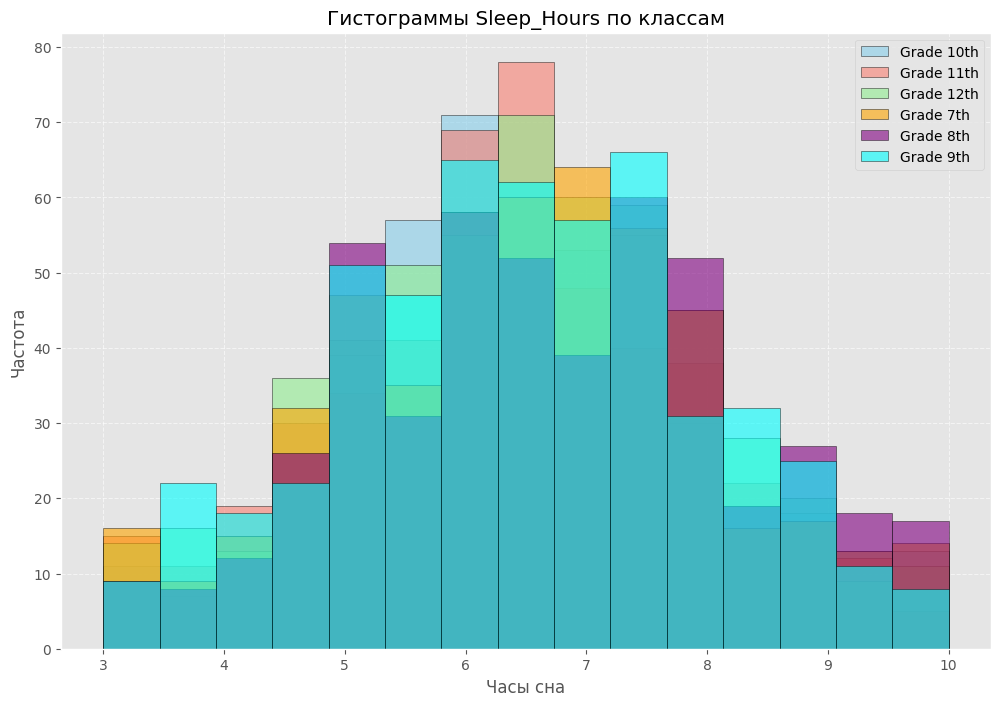


=== IV. Статистики по группам 'School_Grade' ===
                  mean       var
School_Grade                    
10th          6.488296  2.102064
11th          6.367432  2.113079
12th          6.459735  2.201804
7th           6.483702  2.287617
8th           6.675311  2.406853
9th           6.468441  2.196945


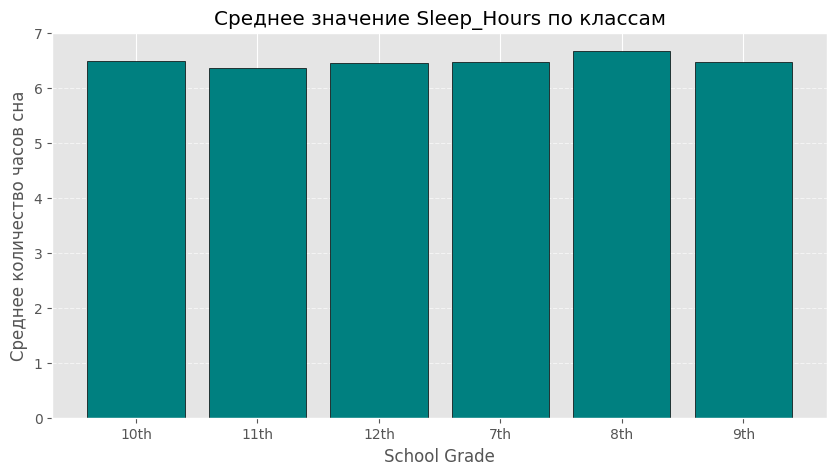

In [35]:
# Группируем по School_Grade
groups = df.groupby('School_Grade')['Sleep_Hours']

# IV.1 Гистограммы на одном графике
plt.figure(figsize=(12, 8))
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'purple', 'cyan', 'magenta']

for i, (grade, values) in enumerate(groups):
    plt.hist(values, bins=15, alpha=0.6, label=f'Grade {grade}', 
             color=colors[i % len(colors)], edgecolor='black')

plt.title('Гистограммы Sleep_Hours по классам')
plt.xlabel('Часы сна')
plt.ylabel('Частота')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# IV.2 Среднее и дисперсия внутри групп
group_stats = groups.agg(['mean', 'var'])
print("\n=== IV. Статистики по группам 'School_Grade' ===")
print(group_stats)

# Визуализация средних
plt.figure(figsize=(10, 5))
plt.bar(group_stats.index, group_stats['mean'], color='teal', edgecolor='black')
plt.title('Среднее значение Sleep_Hours по классам')
plt.xlabel('School Grade')
plt.ylabel('Среднее количество часов сна')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [80]:
group_stats_sorted = group_stats.reset_index()
group_stats_sorted['Grade_Num'] = group_stats_sorted['School_Grade'].str.extract('(\d+)').astype(int)
group_stats_sorted = group_stats_sorted.sort_values(by='Grade_Num').drop(columns='Grade_Num')
group_stats_sorted

,School_Grade,mean,var
3,7th,6.483702,2.287617
4,8th,6.675311,2.406853
5,9th,6.468441,2.196945
0,10th,6.488296,2.102064
1,11th,6.367432,2.113079
2,12th,6.459735,2.201804


Кажется что никаких важных выводов по этим данным сделать нельзя. И балл не зависит от проведенных в телефоне часов и наверно если провести какие-нибудь статистические тесты, то это точно подтвердиться.

## V.
После каждого пункта сделайте промежуточные выводы:
1. Опишите полученные числовые характеристики и графики
2. Являются ли данные нормальными
3. Эффект от обработки данных (удалось ли привести данные к нормальному виду)
4. Различия распределений внутри разных групп 'School_Grade'